In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
         
    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)


In [30]:
np.random.seed(0)

# generate 'n' random samples for each class
n = 50
X1 = np.random.normal(loc=0, scale=1, size=(n, 2))  # class 0
X2 = np.random.normal(loc=2, scale=1, size=(n, 2))  # class 1
X = np.concatenate((X1, X2), axis=0)

# generate corresponding labels
y = np.array([0]*n + [1]*n)


In [31]:
model = LogisticRegression(learning_rate=0.1, n_iters=1000)
model.fit(X, y)

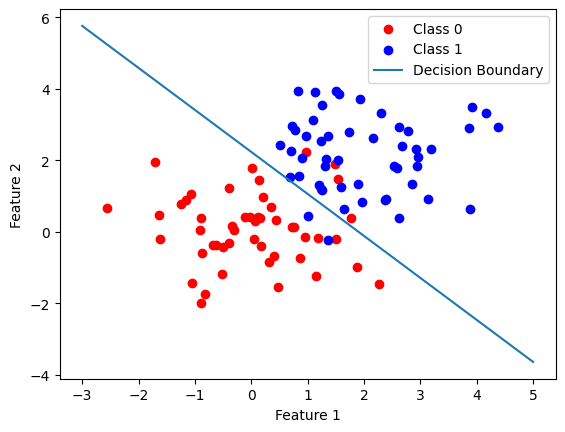

In [32]:
plt.scatter(X[:n, 0], X[:n, 1], color='red', label='Class 0')
plt.scatter(X[n:, 0], X[n:, 1], color='blue', label='Class 1')

x_values = np.linspace(-3, 5, 100)
y_values = -(model.bias + np.dot(model.weights[0], x_values)) / model.weights[1]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [33]:
new_sample = np.array([[1, 1]])
prediction = model.predict(new_sample)

print(f"The predicted class for the new sample {new_sample} is {prediction[0]}")


The predicted class for the new sample [[1 1]] is 0
